In [1]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns
import json
from natsort import natsorted

In [3]:
df = pd.read_csv(f"jess/level2_norm_ss.tsv", delimiter="\t")
df = df.set_index("Unnamed: 0")

df = df.reindex(natsorted(df.columns), axis=1)
df.head(3)

,623361_20180123_S,634207_20180510_S,634207_20180517_S,639354_20171206_S,642660_20180601_S,650003_20180207_S,650003_20180213_S,652927_20180226_S,658355_20170925_S,658355_20171204_S,...,1598281_20180508_S,1651490_20171010_S,1651490_20180206_S,1658447_20171006_S,1664053_20180406_S,1690154_20180406_S,1723809_20180227_S,1834617_20180501_S,1845116_20180403_S,1862551_20180123_S
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Amino Acids and Derivatives;,1182.347902,1547.319643,1276.273834,709.462968,910.075437,892.572693,1002.099459,1074.439435,1531.868521,1107.147576,...,1155.294980,969.063555,829.663049,1072.890236,1279.635442,1417.450572,1190.454612,940.949473,1235.582859,909.870708
"Amino Acids and Derivatives; Alanine, serine, and glycine",2934.411456,4149.806390,3771.513090,5869.914274,2753.645446,4919.615337,4363.022643,3058.845048,2700.728345,2796.169177,...,3124.955177,4836.760923,4662.599970,3261.133725,2858.030792,3289.096096,2649.155329,3906.432489,3210.942932,2727.537952
"Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines",9058.024354,10620.637379,7642.596780,23266.509937,10822.257045,10500.287775,9722.581677,8172.294803,6780.232281,11009.879398,...,10396.131764,14482.472999,21906.295515,9703.807402,8367.852943,7381.077743,12623.019609,14242.686376,9701.017283,6791.534931


In [5]:
dft = df.T

In [6]:
pattern = r'(?P<Patient>\d+)_(?P<Date>\d+)_S'
tmp = dft.index.str.extract(pattern)
cols = ['Patient', 'Date']
labels = pd.DataFrame()
labels[cols] = tmp[cols].values
labels

,Patient,Date
0,623361,20180123
1,634207,20180510
2,634207,20180517
3,639354,20171206
4,642660,20180601
...,...,...
122,1690154,20180406
123,1723809,20180227
124,1834617,20180501
125,1845116,20180403


In [7]:
scaler = StandardScaler()
scaler.fit(dft)
dft_scaled = scaler.transform(dft)
pca = PCA(n_components=2)
pca.fit(dft_scaled)
dft_pca = pca.transform(dft_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  list(dft.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', "Label"])
pct_df = pd.concat([pct_df, labels], axis=1)
pct_df.head(3)

,PC1,PC2,Label,Patient,Date
0,-3.205115,0.190321,623361_20180123_S,623361,20180123
1,-0.365497,-7.505716,634207_20180510_S,634207,20180510
2,-0.452984,-6.787715,634207_20180517_S,634207,20180517


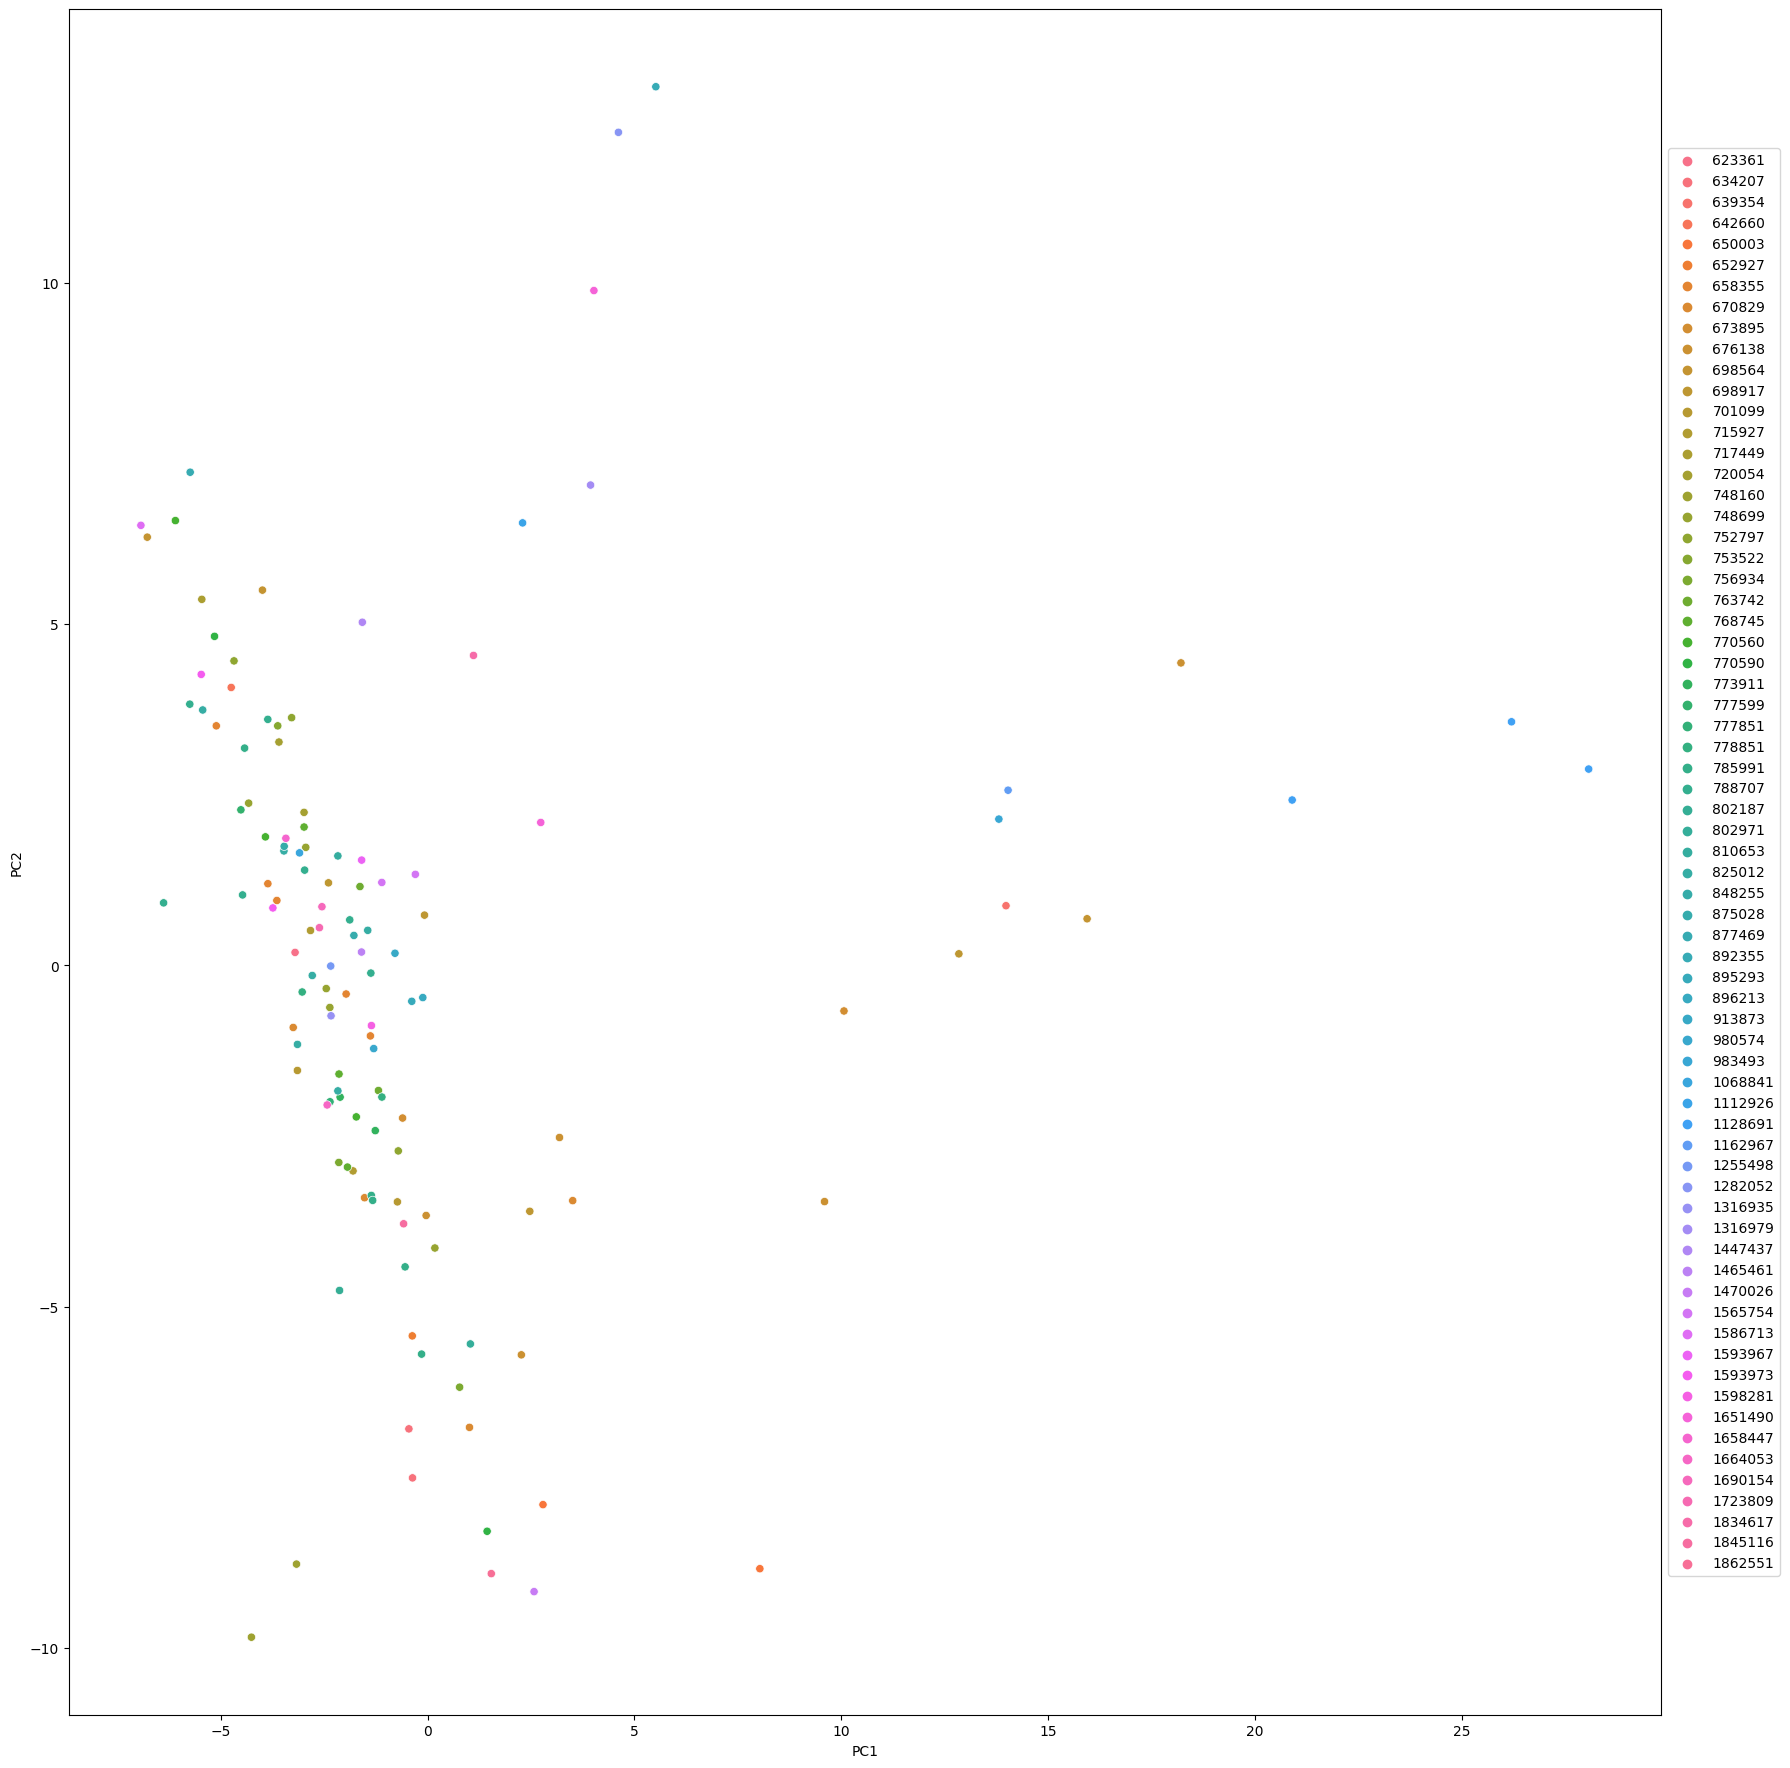

In [10]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Patient', legend=True, data=pct_df, ax=ax)
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [18]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=dft.columns)

In [19]:
loadings

,PC1,PC2
Unnamed: 0,,
Amino Acids and Derivatives;,-0.050755,-0.112240
"Amino Acids and Derivatives; Alanine, serine, and glycine",0.134547,0.040896
"Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines",0.126057,0.127451
Amino Acids and Derivatives; Aromatic amino acids and derivatives,-0.084868,0.054917
Amino Acids and Derivatives; Branched-chain amino acids,0.066140,0.093632
...,...,...
"Stress Response, Defense and Virulence; Stress Response: Electrophile toxicity",0.034007,0.113046
"Stress Response, Defense and Virulence; Stress Response: Heat/cold shock",-0.098530,-0.094437
"Stress Response, Defense and Virulence; Stress Response: Osmotic stress",0.108969,0.081070


In [14]:
dft.shape

(127, 139)

In [17]:
dft.columns.shape

(139,)

In [20]:
loadings.nlargest(10, ['PC1', 'PC2'])

,PC1,PC2
Unnamed: 0,,
Respiration; Electron accepting reactions,0.150984,0.008754
Motility and Chemotaxis; Flagellum,0.145508,0.034222
Motility and Chemotaxis;,0.143555,0.034357
Membrane Transport; Multidrug efflux systems,0.141445,-0.003258
"Miscellaneous; Betaine, crotonobetaine, L-carnitine (trimethyl ammonium compounds)",0.141437,0.038125
Miscellaneous;,0.139061,0.017114
"Membrane Transport; Protein secretion system, Type VI",0.138816,0.033714
Respiration;,0.136637,-0.004951
Sulfur Metabolism;,0.134749,0.040100


In [ ]:
plt.plot([0, x], [0, y], 'k-', lw=2)


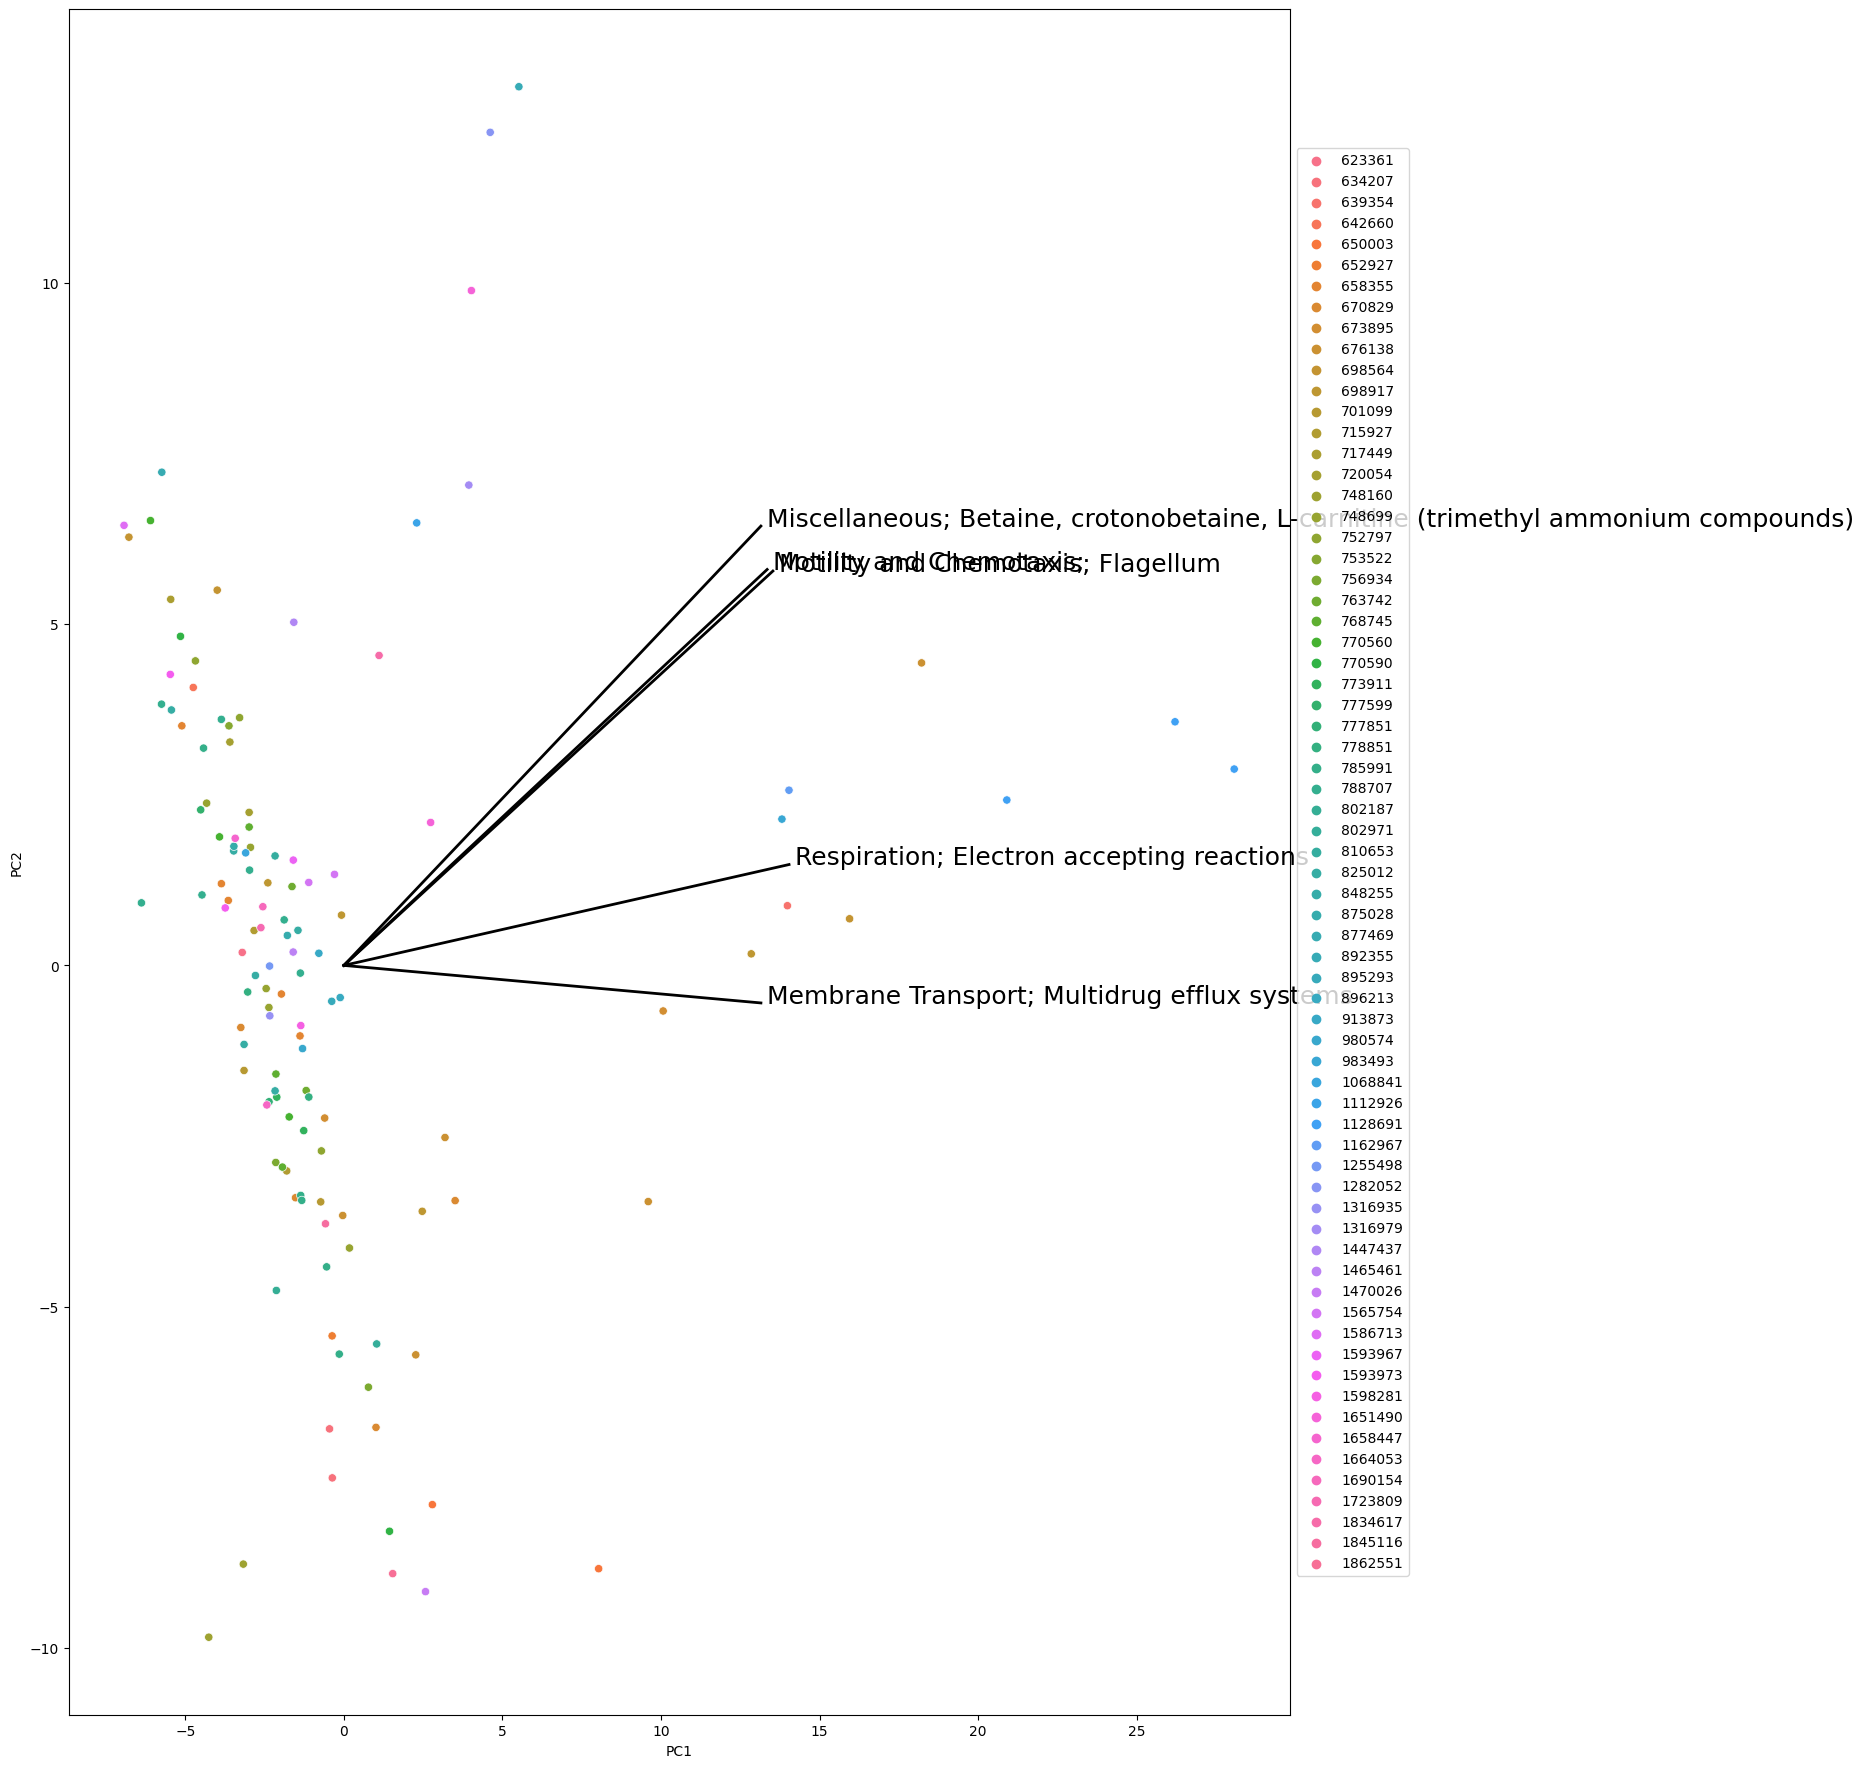

In [53]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Patient', legend=True, data=pct_df, ax=ax)
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ldf = loadings.nlargest(5, ['PC1', 'PC2'])
mlp1 = max(ldf.PC1)
mlp2 = max(ldf.PC2)
mpp1 = max(pct_df.PC1)
mpp2 = max(pct_df.PC2)

for i, l in ldf.iterrows():
    ex = ( l.PC1 * (mpp1/mlp1) ) / 2
    ey = ( l.PC2 * (mpp2/mlp2) ) / 2
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)
plt.tight_layout()

In [26]:
ldf =  loadings.nlargest(10, ['PC1', 'PC2'])
ldf

,PC1,PC2
Unnamed: 0,,
Respiration; Electron accepting reactions,0.150984,0.008754
Motility and Chemotaxis; Flagellum,0.145508,0.034222
Motility and Chemotaxis;,0.143555,0.034357
Membrane Transport; Multidrug efflux systems,0.141445,-0.003258
"Miscellaneous; Betaine, crotonobetaine, L-carnitine (trimethyl ammonium compounds)",0.141437,0.038125
Miscellaneous;,0.139061,0.017114
"Membrane Transport; Protein secretion system, Type VI",0.138816,0.033714
Respiration;,0.136637,-0.004951
Sulfur Metabolism;,0.134749,0.040100


0.15098427316786106	0.008753641437949863
0.14550778750196863	0.034222175676323366
0.14355548021412354	0.03435709386170252
0.1414449662710421	-0.0032577835225033945
0.14143722193981262	0.03812465067183899
0.1390608866414721	0.01711412894834711
0.1388162212634108	0.03371440859582814
0.13663714648243316	-0.0049506622317446744
0.1347488647416957	0.04010031914788262
0.13454662690572972	0.040895922800069234


In [35]:
pct_df

,PC1,PC2,Label,Patient,Date
0,-3.205115,0.190321,623361_20180123_S,623361,20180123
1,-0.365497,-7.505716,634207_20180510_S,634207,20180510
2,-0.452984,-6.787715,634207_20180517_S,634207,20180517
3,13.983815,0.874352,639354_20171206_S,639354,20171206
4,-4.749118,4.070897,642660_20180601_S,642660,20180601
...,...,...,...,...,...
122,-2.555327,0.859580,1690154_20180406_S,1690154,20180406
123,-2.616304,0.552827,1723809_20180227_S,1723809,20180227
124,1.108737,4.539920,1834617_20180501_S,1834617,20180501
125,-0.580697,-3.783901,1845116_20180403_S,1845116,20180403


In [40]:
for i, row in ldf.iterrows():
    print(i)

Respiration; Electron accepting reactions
Motility and Chemotaxis; Flagellum
Motility and Chemotaxis; 
Membrane Transport; Multidrug efflux systems
Miscellaneous; Betaine, crotonobetaine, L-carnitine (trimethyl ammonium compounds)
Miscellaneous; 
Membrane Transport; Protein secretion system, Type VI
Respiration; 
Sulfur Metabolism; 
Amino Acids and Derivatives; Alanine, serine, and glycine


In [37]:
max(loadings.PC1)

0.15098427316786106

In [62]:
dfs = pct_df[pct_df['Patient'] == '788707']
#  + pct_df[pct_df['Patient'] == '825012']
dfs

,PC1,PC2,Label,Patient,Date
73,-4.474334,1.032229,788707_20171213_S,788707,20171213
74,-1.372704,-0.112446,788707_20180129_S,788707,20180129
75,-1.883234,0.666966,788707_20180301_S,788707,20180301
76,-6.383764,0.916099,788707_20180308_S,788707,20180308
77,-2.973767,1.395594,788707_20180313_S,788707,20180313
78,-3.864018,3.603573,788707_20181116_S,788707,20181116
79,-5.750517,3.826286,788707_20181126_S,788707,20181126


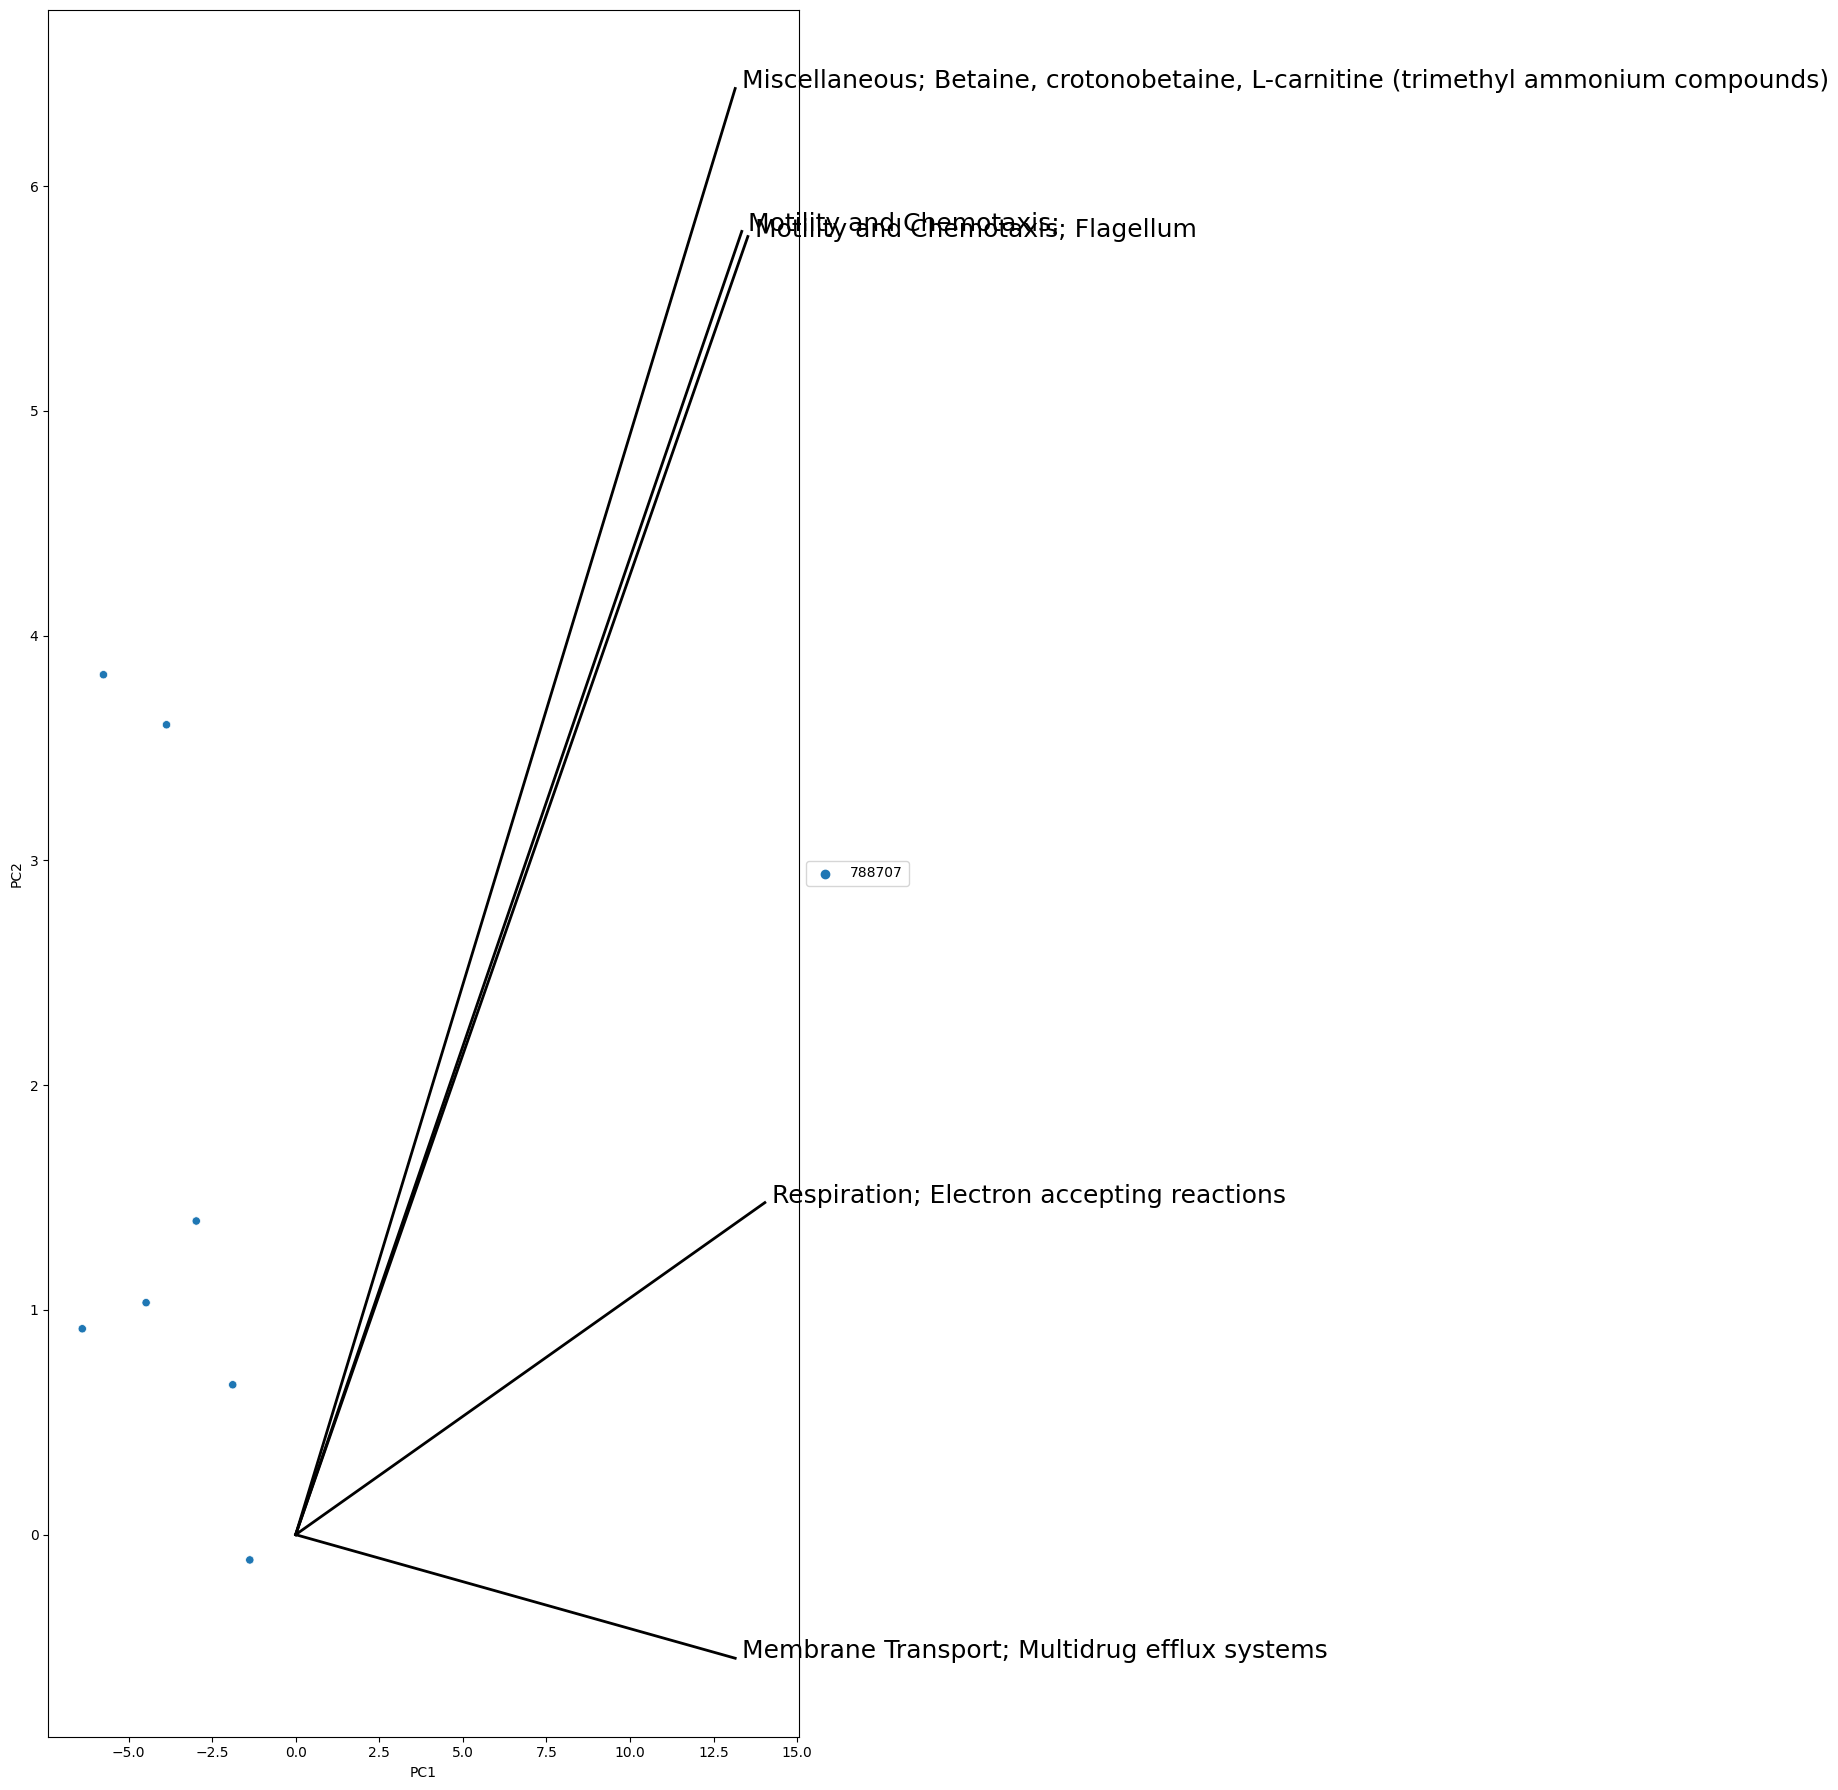

In [63]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.scatterplot(x="PC1", y="PC2", hue='Patient', legend=True, data=dfs, ax=ax)
ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ldf = loadings.nlargest(5, ['PC1', 'PC2'])
mlp1 = max(ldf.PC1)
mlp2 = max(ldf.PC2)
mpp1 = max(pct_df.PC1)
mpp2 = max(pct_df.PC2)

for i, l in ldf.iterrows():
    ex = ( l.PC1 * (mpp1/mlp1) ) / 2
    ey = ( l.PC2 * (mpp2/mlp2) ) / 2
    plt.text(ex+0.2, ey, i, fontsize=18)
    plt.plot([0, ex ], [0, ey ], 'k-', lw=2)
plt.tight_layout()

Unnamed: 0,Amino Acids and Derivatives;,"Amino Acids and Derivatives; Alanine, serine, and glycine","Amino Acids and Derivatives; Arginine; urea cycle, creatine, polyamines",Amino Acids and Derivatives; Aromatic amino acids and derivatives,Amino Acids and Derivatives; Branched-chain amino acids,"Amino Acids and Derivatives; Glutamine, glutamate, aspartate, asparagine; ammonia assimilation",Amino Acids and Derivatives; Histidine Metabolism,"Amino Acids and Derivatives; Lysine, threonine, methionine, and cysteine",Amino Acids and Derivatives; Proline and 4-hydroxyproline,Carbohydrates;,...,"Stress Response, Defense and Virulence; Adhesion","Stress Response, Defense and Virulence; Host-pathogen interactions","Stress Response, Defense and Virulence; Invasion and intracellular resistance","Stress Response, Defense and Virulence; Resistance to antibiotics and toxic compounds","Stress Response, Defense and Virulence; Stress Response","Stress Response, Defense and Virulence; Stress Response: Electrophile toxicity","Stress Response, Defense and Virulence; Stress Response: Heat/cold shock","Stress Response, Defense and Virulence; Stress Response: Osmotic stress","Stress Response, Defense and Virulence; Toxins and superantigens",Sulfur Metabolism;
623361_20180123_S,1182.347902,2934.411456,9058.024354,17292.417136,9988.973643,5854.713004,5343.125180,17334.572048,3624.573283,2.097756,...,556.954301,77.616984,611.495965,47412.369389,11986.229948,28.319710,8500.720427,5610.024714,139.500795,3517.974797
634207_20180510_S,1547.319643,4149.806390,10620.637379,9983.781882,4824.133002,6270.366907,4669.202444,16859.351724,2862.374341,1.624862,...,210.148774,66.619328,14.623755,36600.270499,7267.735360,2.708103,8500.283193,3532.939270,26.810217,2293.975812
634207_20180517_S,1276.273834,3771.513090,7642.596780,12117.668359,7237.676337,7658.802027,4423.884915,15807.596776,2826.477454,7.080576,...,954.107624,0.000000,56.644608,39758.953926,8262.884745,0.000000,8579.740523,3723.181836,103.553425,2398.323871
639354_20171206_S,709.462968,5869.914274,23266.509937,11103.469773,13259.074574,4350.391435,6281.323526,20441.114718,5071.933581,10.569281,...,539.033316,68.700325,502.040834,37042.686569,15749.109032,52.846404,7075.693049,11153.485119,650.010764,7616.487912
642660_20180601_S,910.075437,2753.645446,10822.257045,23311.328505,13030.432895,4771.821648,4162.483043,19835.913915,4731.188608,3.139996,...,660.969107,7.849989,51.809930,47077.642395,11614.582641,15.699979,8006.204183,5861.250652,38.464948,3311.144217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690154_20180406_S,1417.450572,3289.096096,7381.077743,19488.284729,11097.108468,6251.068307,5405.480667,17309.270427,3821.017478,6.211213,...,156.315528,2.070404,158.385932,51789.352991,12890.164894,14.492830,7955.269880,5565.320812,208.593237,3389.868098
1723809_20180227_S,1190.454612,2649.155329,12623.019609,16125.671634,9296.387837,5589.217802,4415.678954,18035.728501,3618.972019,8.401444,...,414.071169,34.205879,1426.445173,47045.586061,13311.287906,149.425683,8861.573102,5326.144014,79.813718,3932.054402
1834617_20180501_S,940.949473,3906.432489,14242.686376,17382.110456,11243.863436,4923.328355,8064.194455,19159.713730,4866.546200,0.000000,...,13131.160553,357.244809,945.338230,43718.352857,9489.516395,1050.668395,7335.441377,8695.318592,2708.740740,3652.542904
1845116_20180403_S,1235.582859,3210.942932,9701.017283,13281.919023,7221.923542,5772.066104,3802.867665,17336.376061,3517.533717,5.616073,...,271.817933,25.272328,1085.025302,42702.035632,11286.996295,70.762520,8992.783678,4759.193969,83.117880,3521.712343


In [ ]:
scaler = StandardScaler()
scaler.fit(dft)
dft_scaled = scaler.transform(dft)
pca = PCA(n_components=2)
pca.fit(dft_scaled)
dft_pca = pca.transform(dft_scaled)
zipped = list(zip(dft_pca[:,0],
                  dft_pca[:,1],
                  list(dft.index),
                 ))
pct_df = pd.DataFrame(zipped, columns=['PC1', 'PC2', "Label"])
pct_df = pd.concat([pct_df, labels], axis=1)
pct_df.head(3)